# MAP vs MLE mean estimate

**Aim:** understand the difference between the MAP and MLE estimate in the Bayesian framework

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import time
import warnings
from IPython import display
warnings.filterwarnings('ignore')

## Get the oracle

Import the oracle functions `oracle_sigma` and `oracle_sample`. Do not look at their code.

The function `oracle_sample` when invoked will output one value sampled from a probability distribution `P` that expresses the height of human male. 

The probability distribution `P` is a normal distribution with unknown mean and known standard deviation.

The function `oracle_sigma` will output the value of the standard deviation of `P`. 


In [1]:
from oracle import oracle_sigma, oracle_sample

## Question 1

Retreive `n_samples` from the oracle. 

a) Make the function `mu_N, sigma_N = update_model(samples, sigma, mu_0, sigma_0)` to compute the MAP estimate of the mean of a Normal distribution with a known standard deviation given the samples retrieved.

For reference consider the relations:

$\frac{1}{\sigma_N^2} = \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}$

$\mu_N = \sigma_N^2 (\frac{\mu_0}{\sigma_0^2} + \frac{N \bar{t}}{\sigma^2})$

$\bar{t}= \frac{1}{N} \sum_{n=1}^N t_n$

where $\mu_0, \sigma_0$ refer to the priors (see the lecture material for details). 


In [8]:
def update_model(samples, sigma, mu_0, sigma_0):
    # YOUR CODE HERE
    N = len(samples)
    sigma_N_inverse = 1/(sigma_0**2) + N/(sigma**2)
    sigma_N = 1/sigma_N_inverse
    t_avg = sum(samples)/N
    mu_N = (1/sigma_N_inverse)*(mu_0/(sigma_0**2) + (N*t_avg)/(sigma**2))
    return mu_N,sigma_N

In [9]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS
test_samples = np.random.randn(1000000)
mu_N, sigma_N = update_model(test_samples, sigma=10, mu_0=1, sigma_0=1)
assert mu_N < 1e-2, 'update_model should compute a mu_N close to 0 instead of %.3f'%mu_N
assert np.fabs(sigma_N - 0.001) < 0.01, 'update_model should compute a sigma_N close to 0.001 instead of %.3f'%sigma_N
### END TESTS

## Question 2

Make a function `display_iterative_estimate(mu_0, sigma_0, n_samples)` to plot the iterative MAP and Maximum Likelihood (MLE) estimate when sampling up to `n_samples` from the oracle. 

You should plot the samples as dots.

You should plot the MAP estimate reporting the confidence of the estimate (i.e. +-1 std).

You should plot the MLE estimate.


You should obtain something like:

<img src='plot.png' width=500>

In [49]:
def display_iterative_estimate(mu_0, sigma_0, n_samples):
    # YOUR CODE HERE
    mu = []
    sigmas = []
    samples = []
    ts = []
    for i in range(1,n_samples+1):
        samples.append(oracle_sample())
        x_axis = [j for j in range(i)]
        #print(x_axis)
        sigma = np.std(samples)
        mu_N,sigma_N = update_model(samples,sigma,mu_0,sigma_0)
        sigmas.append(sigma_N)
        mu.append(mu_N)
        ts.append(np.mean(samples))
        plt.gca().cla()
        plt.scatter(x_axis,samples,color='red')
        plt.plot(mu,color='b',label='MAP')
        plt.errorbar(x_axis,mu,yerr=sigmas,color='b')
        plt.plot(ts,color='orange',label='MLE')
        plt.grid()
        plt.title(max(mu))
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(1)
    display.clear_output()

    



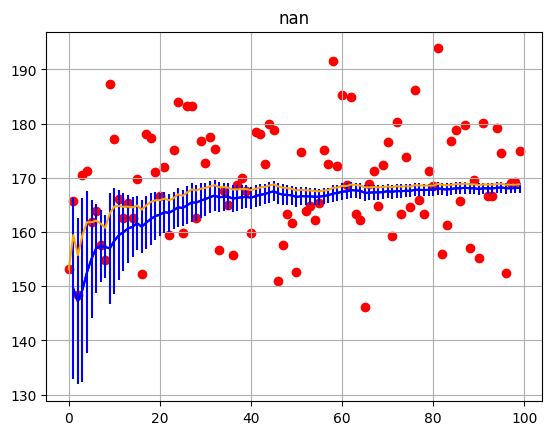

In [50]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS
try:
    display_iterative_estimate(mu_0=100, sigma_0=10, n_samples=100)
except Exception:
    assert False, 'the function should not raise an exception when asked to plot the train and test errors'
else:
    pass
### END TESTS

## Question 3

Experiment with different hypothesis for the prior using your common sense knowledge. 

Try using up to 10 samples for:
1. a wrong large value for $\mu_0$ with a strong confidence
2. a wrong large value for $\mu_0$ admitting a large uncertainty on the prior 
3. your best estimate for the average male height $\mu_0$ and a reasonable confidence

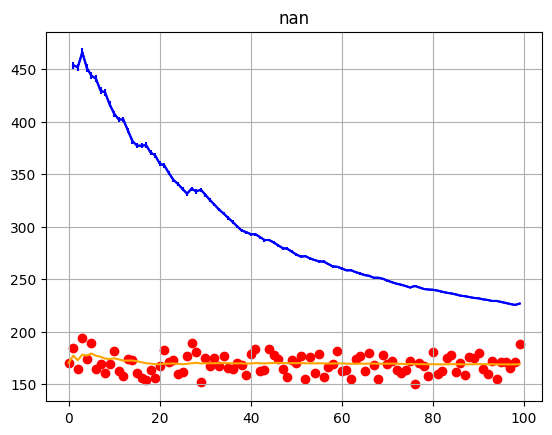

In [51]:
display_iterative_estimate(mu_0=500, sigma_0=2, n_samples=100)

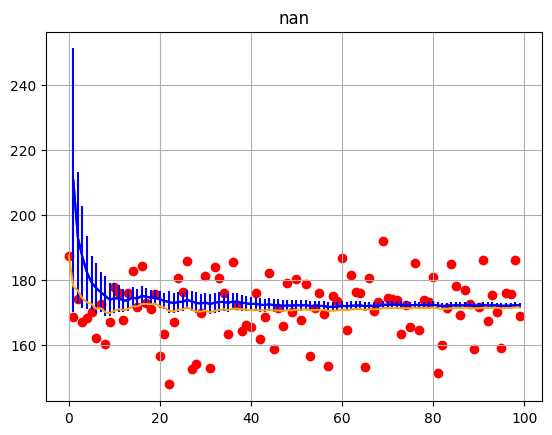

In [52]:
display_iterative_estimate(mu_0=500, sigma_0=20, n_samples=100)

## Bonus question

Compute what is the median MAP and MLE estimate after 25 samples starting from a range of priors, e.g. `mu_0 = [150,160,170,180,190]` and `sigma_0 = 10`. You should repeat the MAP and MLE estimates 1000 times. 

You may import the function `oracle_mean` to compute the estimate errors.

---